### 

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 11 19:15:23 2020

@author: juan
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from numpy import asarray
from numpy import savetxt

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)


In [2]:
#==============================================================================
#LEER DATOS
#==============================================================================
fecha = '2022-11-26'

casos = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

sintomas = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

poblaciones = pd.read_excel('PoblacionMunicipal.xlsx')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

sintomas = sintomas[sintomas.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoSintomas = sintomas['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']

faltanCasosMuni = np.array(list(set(casos.municipio).symmetric_difference(poblaciones.municipio)))
faltanCasosDepto = []
for i in range(len(faltanCasosMuni)):
    faltanCasosDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'departamento'].iloc[0])
faltanCasosCodigoMuni = []
for i in range(len(faltanCasosMuni)):
    faltanCasosCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'codigo_municipio'].iloc[0])
faltanCasosPob = []
for i in range(len(faltanCasosMuni)):
    faltanCasosPob.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'poblacion'].iloc[0])
faltanCasosCodigoDepto = []
for i in range(len(faltanCasosMuni)):
    if faltanCasosDepto[i] == 'ALTA VERAPAZ':
        faltanCasosCodigoDepto.append(16)
    elif faltanCasosDepto[i] == 'BAJA VERAPAZ':
        faltanCasosCodigoDepto.append(15)
    elif faltanCasosDepto[i] == 'CHIMALTENANGO':
        faltanCasosCodigoDepto.append(4)
    elif faltanCasosDepto[i] == 'CHIQUIMULA':
        faltanCasosCodigoDepto.append(20)
    elif faltanCasosDepto[i] == 'EL PROGRESO':
        faltanCasosCodigoDepto.append(2)
    elif faltanCasosDepto[i] == 'ESCUINTLA':
        faltanCasosCodigoDepto.append(5)
    elif faltanCasosDepto[i] == 'GUATEMALA':
        faltanCasosCodigoDepto.append(1)
    elif faltanCasosDepto[i] == 'HUEHUETENANGO':
        faltanCasosCodigoDepto.append(13)
    elif faltanCasosDepto[i] == 'IZABAL':
        faltanCasosCodigoDepto.append(18)
    elif faltanCasosDepto[i] == 'JALAPA':
        faltanCasosCodigoDepto.append(21)
    elif faltanCasosDepto[i] == 'JUTIAPA':
        faltanCasosCodigoDepto.append(22)
    elif faltanCasosDepto[i] == 'PETEN':
        faltanCasosCodigoDepto.append(17)
    elif faltanCasosDepto[i] == 'QUETZALTENANGO':
        faltanCasosCodigoDepto.append(9)
    elif faltanCasosDepto[i] == 'QUICHE':
        faltanCasosCodigoDepto.append(14)
    elif faltanCasosDepto[i] == 'RETALHULEU':
        faltanCasosCodigoDepto.append(11)
    elif faltanCasosDepto[i] == 'SACATEPEQUEZ':
        faltanCasosCodigoDepto.append(3)
    elif faltanCasosDepto[i] == 'SAN MARCOS':
        faltanCasosCodigoDepto.append(12)
    elif faltanCasosDepto[i] == 'SANTA ROSA':
        faltanCasosCodigoDepto.append(6)
    elif faltanCasosDepto[i] == 'SOLOLA':
        faltanCasosCodigoDepto.append(7)
    elif faltanCasosDepto[i] == 'SUCHITEPEQUEZ':
        faltanCasosCodigoDepto.append(10)
    elif faltanCasosDepto[i] == 'TOTONICAPAN':
        faltanCasosCodigoDepto.append(8)
    elif faltanCasosDepto[i] == 'ZACAPA':
        faltanCasosCodigoDepto.append(19)

faltanSintomasMuni = np.array(list(set(sintomas.municipio).symmetric_difference(poblaciones.municipio)))
faltanSintomasDepto = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'departamento'].iloc[0])
faltanSintomasCodigoMuni = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'codigo_municipio'].iloc[0])
faltanSintomasPob = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasPob.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'poblacion'].iloc[0])
faltanSintomasCodigoDepto = []
for i in range(len(faltanSintomasMuni)):
    if faltanSintomasDepto[i] == 'ALTA VERAPAZ':
        faltanSintomasCodigoDepto.append(16)
    elif faltanSintomasDepto[i] == 'BAJA VERAPAZ':
        faltanSintomasCodigoDepto.append(15)
    elif faltanSintomasDepto[i] == 'CHIMALTENANGO':
        faltanSintomasCodigoDepto.append(4)
    elif faltanSintomasDepto[i] == 'CHIQUIMULA':
        faltanSintomasCodigoDepto.append(20)
    elif faltanSintomasDepto[i] == 'EL PROGRESO':
        faltanSintomasCodigoDepto.append(2)
    elif faltanSintomasDepto[i] == 'ESCUINTLA':
        faltanSintomasCodigoDepto.append(5)
    elif faltanSintomasDepto[i] == 'GUATEMALA':
        faltanSintomasCodigoDepto.append(1)
    elif faltanSintomasDepto[i] == 'HUEHUETENANGO':
        faltanSintomasCodigoDepto.append(13)
    elif faltanSintomasDepto[i] == 'IZABAL':
        faltanSintomasCodigoDepto.append(18)
    elif faltanSintomasDepto[i] == 'JALAPA':
        faltanSintomasCodigoDepto.append(21)
    elif faltanSintomasDepto[i] == 'JUTIAPA':
        faltanSintomasCodigoDepto.append(22)
    elif faltanSintomasDepto[i] == 'PETEN':
        faltanSintomasCodigoDepto.append(17)
    elif faltanSintomasDepto[i] == 'QUETZALTENANGO':
        faltanSintomasCodigoDepto.append(9)
    elif faltanSintomasDepto[i] == 'QUICHE':
        faltanSintomasCodigoDepto.append(14)
    elif faltanSintomasDepto[i] == 'RETALHULEU':
        faltanSintomasCodigoDepto.append(11)
    elif faltanSintomasDepto[i] == 'SACATEPEQUEZ':
        faltanSintomasCodigoDepto.append(3)
    elif faltanSintomasDepto[i] == 'SAN MARCOS':
        faltanSintomasCodigoDepto.append(12)
    elif faltanSintomasDepto[i] == 'SANTA ROSA':
        faltanSintomasCodigoDepto.append(6)
    elif faltanSintomasDepto[i] == 'SOLOLA':
        faltanSintomasCodigoDepto.append(7)
    elif faltanSintomasDepto[i] == 'SUCHITEPEQUEZ':
        faltanSintomasCodigoDepto.append(10)
    elif faltanSintomasDepto[i] == 'TOTONICAPAN':
        faltanSintomasCodigoDepto.append(8)
    elif faltanSintomasDepto[i] == 'ZACAPA':
        faltanSintomasCodigoDepto.append(19)
#==============================================================================
#AGREGAR DATOS QUE FALTAN
#==============================================================================
#extraer una fila del df de casos´
primerafila = casos.iloc[1]
primerafila = primerafila.iloc[5:].values
datosFaltan = np.zeros(len(primerafila))

datosFaltanCasosCols = casos.columns
datosFaltanSintomasCols = sintomas.columns

datosFaltanCasos = np.zeros((len(faltanCasosDepto),len(datosFaltanCasosCols))).astype(object)
for i in range(len(faltanCasosDepto)):
    for j in range(len(datosFaltanCasosCols)):
        if j ==0:
            datosFaltanCasos[i][j] = faltanCasosDepto[i]
        elif j==1:
            datosFaltanCasos[i][j] = faltanCasosCodigoDepto[i]
        elif j==2:
            datosFaltanCasos[i][j] = faltanCasosMuni[i]
        elif j==3:
            datosFaltanCasos[i][j] = faltanCasosCodigoMuni[i]
        elif j==4:
            datosFaltanCasos[i][j] = faltanCasosPob[i]
            
datosFaltanSintomas = np.zeros((len(faltanSintomasDepto),len(datosFaltanSintomasCols))).astype(object)
for i in range(len(faltanSintomasDepto)):
    for j in range(len(datosFaltanSintomasCols)):
        if j ==0:
            datosFaltanSintomas[i][j] = faltanSintomasDepto[i]
        elif j==1:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoDepto[i]
        elif j==2:
            datosFaltanSintomas[i][j] = faltanSintomasMuni[i]
        elif j==3:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoMuni[i]
        elif j==4:
            datosFaltanSintomas[i][j] = faltanSintomasPob[i]
            
FaltanCasos = pd.DataFrame(datosFaltanCasos,columns=casos.columns)
FaltanSintomas = pd.DataFrame(datosFaltanSintomas,columns=sintomas.columns)

print('En casos positivos no hay datos de ' + str(FaltanCasos['municipio'].values))
print('En sintomas no hay datos de ' + str(FaltanSintomas['municipio'].values))

casos = casos.append(FaltanCasos)
sintomas = sintomas.append(FaltanSintomas)


En casos positivos no hay datos de []
En sintomas no hay datos de []


/tmp/ipykernel_6194/2070872721.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  casos = casos.append(FaltanCasos)
/tmp/ipykernel_6194/2070872721.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sintomas = sintomas.append(FaltanSintomas)


In [3]:
faltanCasosMuni

array([], dtype=float64)

In [4]:
#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

casosDepto = {}
for depto in departamentos:
    casosDepto[depto] = pd.DataFrame(casos.loc[casos['departamento'] == depto])
    casosDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    casosDepto[depto] = casosDepto[depto].set_index('municipio')
    
sintomasDepto = {}

for depto in departamentos:
    sintomasDepto[depto] = pd.DataFrame(sintomas.loc[sintomas['departamento'] == depto])
    sintomasDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    sintomasDepto[depto] = sintomasDepto[depto].set_index('municipio')
    
pobDepto = {}

for depto in departamentos:
    pobDepto[depto] = pd.DataFrame(poblaciones.loc[poblaciones['departamento'] == depto])
    pobDepto[depto].drop(['codigo_municipio','departamento'], axis = 1, inplace = True)
    pobDepto[depto] = pobDepto[depto].set_index('municipio')
    

In [5]:
#municipios

In [6]:
#==============================================================================
#DATOS POR DEPARTAMENTO UTILES
#==============================================================================
fechas = casosDepto['GUATEMALA'].columns.values
fechas1 = fechas[7::14]
fechas2 = fechas1[1:len(fechas1)]
diasMediaMovil = 14

NOMBREDEPTO = []
Poblacion =[]
POSITIVOSDEPTO = []
SINTOMASDEPTO = []

for depto in departamentos:
    pob = 0
    cantidadMunicipios = len(casosDepto[depto].index)
    positivosDepto = np.zeros(len(fechas))
    sintomasTotalesDepto = np.zeros(len(fechas))
    mediamovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    
    for muni in casosDepto[depto].index:
        
        positivos = casosDepto[depto].loc[muni].values.astype(float)
        sintomasTotales = sintomasDepto[depto].loc[muni].values.astype(float)
        
        positivosDepto = positivos + positivosDepto
        
        sintomasTotalesDepto = sintomasTotalesDepto + sintomasTotales
        
        pob += pobDepto[depto].loc[muni].values[0]
        
    for i in range(len(positivosDepto)-diasMediaMovil):
        mediamovilDepto[i] = np.mean(positivosDepto[i:i+diasMediaMovil]) #LINEA IMPORTANTE
    
    NOMBREDEPTO.append(depto)
    Poblacion.append(pob)
    POSITIVOSDEPTO.append(mediamovilDepto)#POSITIVOSDEPTO.append(positivosDepto)
    SINTOMASDEPTO.append(sintomasTotalesDepto)
    
acumuladosReportados = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))
acumuladosSintomas = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))

for j in range(len(NOMBREDEPTO)):
    for i in range(len(POSITIVOSDEPTO[0])-1):
        if i ==0:
            acumuladosReportados[j][i] = POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = SINTOMASDEPTO[j][i]
            
        else:
            acumuladosReportados[j][i] = acumuladosReportados[j][i-1] + POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = acumuladosSintomas[j][i-1] + SINTOMASDEPTO[j][i]
#HASTA ACA LIMPIEZA Y EXTRACCION DE DATOS


In [7]:
fechas[0]

'2020-02-14'

In [8]:
#==============================================================================
#ESTIMACIONES DE BETA y OTRAS VARIABLES DEL MODELO SIR
#==============================================================================
#INICIALIZACION DE VARIABLES
gamma = 1./21.
gamma_inv = int(1/gamma)
A = acumuladosReportados #TOTAL DE INDIVIDUOS QUE SE HAN INFECTADO.
dA = POSITIVOSDEPTO #CASOS NUEVOS REPORTADOS CADA DIA POR CADA DEPARTAMENTO
R = np.zeros((len(A),len(A[0])))
I = A - R
S = np.zeros((len(A),len(A[0])))
Beta = np.zeros((len(A),len(A[0])))
Rt = np.zeros((len(A),len(A[0])))
R0 = np.zeros((len(A),len(A[0])))

inicio = 100

for i in range(len(A)):
    for j in range(len(A[0])):
        S[i][j] = Poblacion[i] - A[i][j] #ECUACION (4.37)
        
for i in range(len(A)):
    N = Poblacion[i]
    for j in range(len(A[0])-1):
        if j>(gamma_inv-1): #porque empezamos desde j=0.
            R[i][j] = dA[i][j-gamma_inv] + R[i][j-1] #ECUACION (4.38)
        else:
            R[i][j] = 0
            
        if A[i][j] - R[i][j] <= 0:
            I[i][j] = I[i][j-1]
        else:
            I[i][j] = A[i][j] - R[i][j] #ECUACION (4.39)
        S[i][j] = N - I[i][j] - R[i][j]
        Beta[i][j] = dA[i][j+1]/(S[i][j]*I[i][j])*N ##ECUACION (5.1)
        #mas adelante quitar el ultimo de beta porque es cero.
        Rt[i][j] = Beta[i][j]/gamma * S[i][j]/N
        R0[i][j] = Beta[i][j]/gamma
        
        if A[i][j] <= 0:
            A[i][j] = A[i][j-1]


In [9]:
fechas[17] #esta base de datos va cada dos dias. el día 17 es el del primer infectado.
#que la limpeiza sea mejor empezar desde el dia 17

'2020-03-13'

In [10]:
fechas[80]

'2020-05-16'

In [11]:
fechas[990]

'2022-11-12'

In [14]:
#Beta_clean = Beta[0][0:][~(np.isnan(Beta[0][0:]))]
#Beta_clean = Beta_clean[~np.isinf(Beta_clean)]
#Beta_clean

In [15]:
len(Beta[0])-1 #el ultimo dia no tiene datos

990

In [12]:

def DifFinitas2(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, t, dt):
    Infectados = [I0]
    Sucept = [S0] ##########OJO EL PRIMER RESULTADO DE LA SOLUCION ES IGUAL AL VALOR INICIAL, LO MODIFICAREMOS
    Removidos = [R0]
    RepDiario = [dA0]
    ACUMULADO = [A0]
    gamma_inv = int(1/gamma)
    TamanioPrueba = t #el tamanio final es TamanioPrueba + 1
    for j in range(TamanioPrueba):
#        dA1 = BetaCoef[j][0]*I0*S0/Poblacion[n] - gamma*I0 #por persona
        #no tengo que restarle los recuperados a los acumulados, debo restarlo en los infectados actuales
    #    dA1 = BetaCoef[j][0]*I0*S0 - gamma*I0
        dA1 = BetaCoef[j]*I0*S0/Poblacion[n]
        S1 = S0 - BetaCoef[j]*I0*S0/Poblacion[n]
        A1 = A0 + dA1
        R1 = R0 + gamma*I0
        I1 = I0 + dA1  -  gamma*I0 
        #if j > (gamma_inv-1):
        #    R1 = R0 + RepDiario[j-gamma_inv]
        #    I1 = I0 + dA1  - RepDiario[j-gamma_inv]
        #else:
        #    R1 = R0
        #    I1 = I0 + dA1
        Infectados.append(I1)
        Sucept.append(S1)
        Removidos.append(R1)
        RepDiario.append(dA1)
        ACUMULADO.append(A1)
        I0, S0, R0, A0 = I1, S1, R1, A1
    return Infectados, Sucept, Removidos, ACUMULADO, RepDiario



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


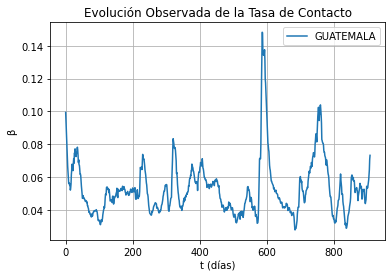

In [13]:
n=0
plt.plot(Beta[0][80:len(Beta[0])-1], label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Evolución Observada de la Tasa de Contacto") 

plt.xlabel("t (días)")
plt.ylabel("\u03B2")
plt.grid()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'TODO_BETA.eps', bbox_inches = 'tight')

#plt.scatter([0, 1,2,3,4,5,6,7,8,9],Beta[0][660:670])

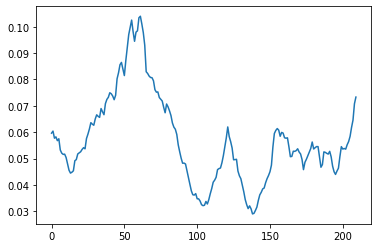

In [14]:
plt.plot(Beta[0][80+700:len(Beta[0])-1], label = NOMBREDEPTO[0])


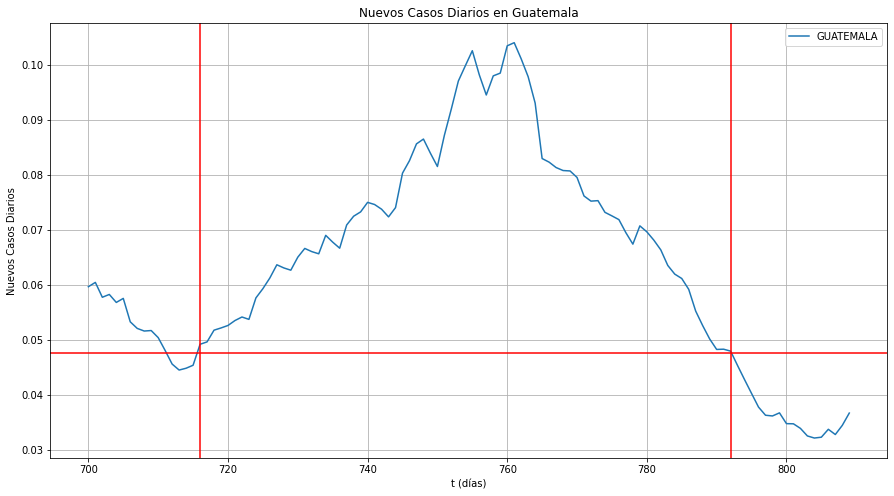

<Figure size 432x288 with 0 Axes>

In [22]:
#OLA 2
#analizar
t1=80+700
t2 =80+ 810
x= []
for i in range(t1-80,t2-80):#hemos colocado el origen en 80 por lo que restamos 80:
    x.append(i)
fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(x,Beta[0][t1:t2], label = NOMBREDEPTO[0])
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
ax.axhline(y = 1/21., color = 'r', linestyle = '-')
ax.axvline(x = 796-80., color = 'r', linestyle = '-')
ax.axvline(x = 872-80., color = 'r', linestyle = '-')

plt.grid()
plt.show()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'OLA2Beta.eps', bbox_inches = 'tight')


In [23]:
tmax = 841-80
beta_max = Beta[0][tmax+80]
gamma = 1./21.
t0 = 796 -80#desde donde  beta = gamma
#w= tmax-t0
#de 780 a 841, 60 dias

In [24]:
def Beta_Func(t0,tmax, beta_max, gamma, t_extra):
    Delta_t = (tmax-t0)
    m = (beta_max - gamma)/ Delta_t
    funcion_beta = gamma
    Beta_vector = [gamma]#-----esta es la linea 5
    for i in range(Delta_t):
        funcion_beta += m#*dt =1
        Beta_vector.append(funcion_beta)
    for i in range(Delta_t + t_extra):
        funcion_beta += - m#*dt =1
        Beta_vector.append(funcion_beta)
    return Beta_vector
    
    
    

In [25]:
BetaCoef  = Beta_Func(t0,tmax, beta_max, gamma, 10)

In [40]:
DeltaT = 2*(tmax-t0)+10 + 1#el 1 es porque se empieza desde la linea 5, el 10 es el extra después de que se regresa a gama

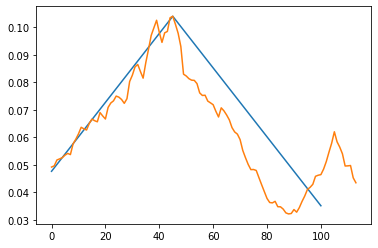

In [41]:
#Ola 4
plt.plot(BetaCoef)
plt.plot(Beta[0][t0+80:t2])

In [42]:
A0 , dA0, S0, I0, R0 = A[n][t1], dA[n][t0+80], S[n][t0+80], I[n][t0+80], R[n][t0+80] 
#t =t2-t1
t = DeltaT
dt = 1
Infectados, Sucept, Removidos, ACUMULADO, RepDiario = DifFinitas2(I0,S0,R0,BetaCoef,n,Poblacion,dA0,A0, gamma, t,dt)


In [43]:
A0 , dA0, S0, I0, R0

(404834.2142857141,
 266.85714285714283,
 3105946.285714286,
 6617.571428571537,
 403211.1428571426)

In [44]:
#BetaCoef

In [45]:
len(BetaCoef)

101

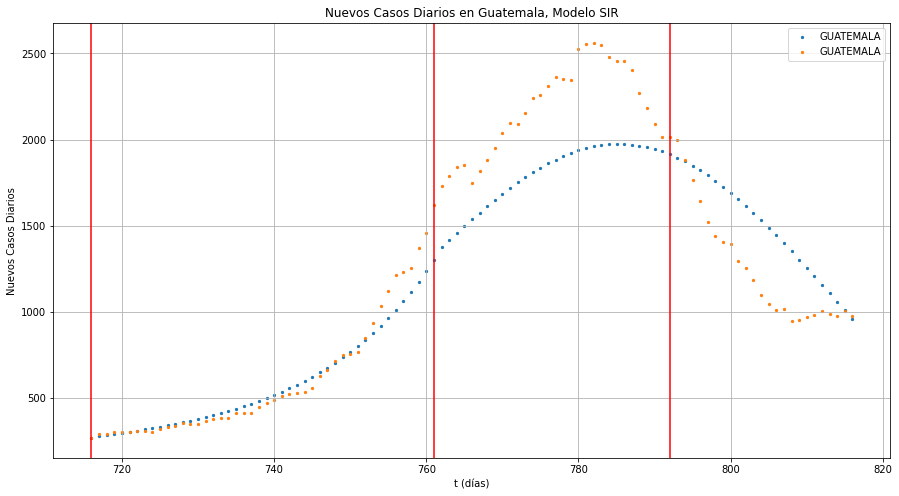

In [46]:
x=[]
for i in range(t0,t0+t):
    x.append(i)
    
from matplotlib.pyplot import figure

#figure(figsize=(7, 4), dpi=100)
#plt.scatter(color, dA[0][t1:t2],  s=1)#, cmap='nipy_spectral')
fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(x,RepDiario[0:t],  s=5 , label = NOMBREDEPTO[0])
plt.scatter(x,dA[0][t0+80:t0+80+len(x)],  s=5 , label = NOMBREDEPTO[0])
ax.axvline(x = 796-80., color = 'r', linestyle = '-')
ax.axvline(x = 841-80., color = 'r', linestyle = '-')

ax.axvline(x = 872-80., color = 'r', linestyle = '-')
plt.legend(loc="best")
plt.title("Nuevos Casos Diarios en Guatemala, Modelo SIR")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.grid()
plt.show()


In [47]:
len(RepDiario)

102

In [48]:
t0, t0+DeltaT+10+1

(716, 828)

In [49]:
DeltaT

101

In [55]:
def PorcentajeError(p, serie):
    serie = np.array(serie)
    SUP = serie + serie*p/100
    INF = serie - serie*p/100
    sup = SUP.tolist()
    inf = INF.tolist()
    return sup, inf

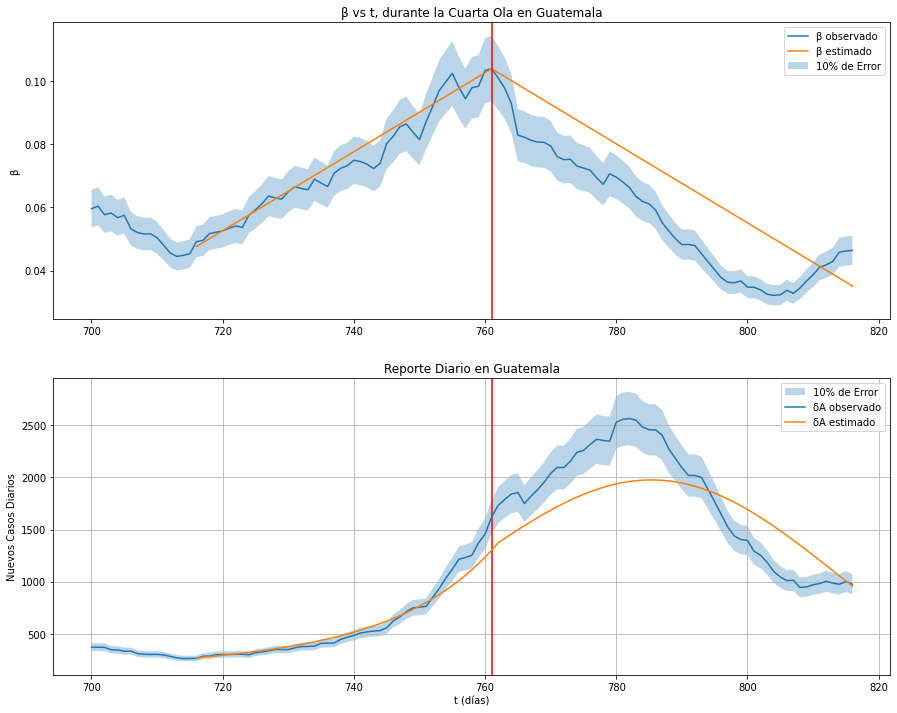

In [83]:
#OLA 2
#analizar
t1=80+700
t2 =80+ 817
x= []
for i in range(t1,t2):
    x.append(i-80) #Para las observaciones
    
    
x_observacion = []
for i in range(t0,t0+DeltaT):
    x_observacion.append(i) #Para las observaciones...NOOOO, es para las predicciones.



Beta_error_sup, Beta_error_inf = PorcentajeError(10, Beta[0][t1:t2]) 
dA_error_sup, dA_error_inf = PorcentajeError(10, dA[0][t1:t2])     
    
fig, ax = plt.subplots(2,1, figsize=(15, 12))

ax[0].plot(x,Beta[0][t1:t2], label = "\u03B2 observado")
ax[0].plot(x_observacion,BetaCoef, label = "\u03B2 estimado" )
ax[0].legend(loc="best")
ax[0].set_title("\u03B2 vs t, durante la Cuarta Ola en Guatemala")
ax[0].set_ylabel("\u03B2")
ax[0].axvline(x = 761., color = 'r', linestyle = '-')
ax[1].axvline(x = 761., color = 'r', linestyle = '-')

ax[0].fill_between(x, Beta_error_inf, Beta_error_sup, alpha=0.3, label = '10% de Error')
ax[0].legend(loc="best")
ax[1].fill_between(x, dA_error_inf, dA_error_sup, alpha=0.3, label = '10% de Error')
ax[1].legend(loc="best")


ax[1].plot(x, dA[0][t1:t2], label = "\u03B4A observado")
ax[1].plot(x_observacion,RepDiario[0:t], label = "\u03B4A estimado")
ax[1].legend(loc="best")
ax[1].set_title("Reporte Diario en Guatemala")
ax[1].set_ylabel("Reporte Diario")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.grid()
#plt.show()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'ModeladoOLA4Beta.pdf', bbox_inches = 'tight')


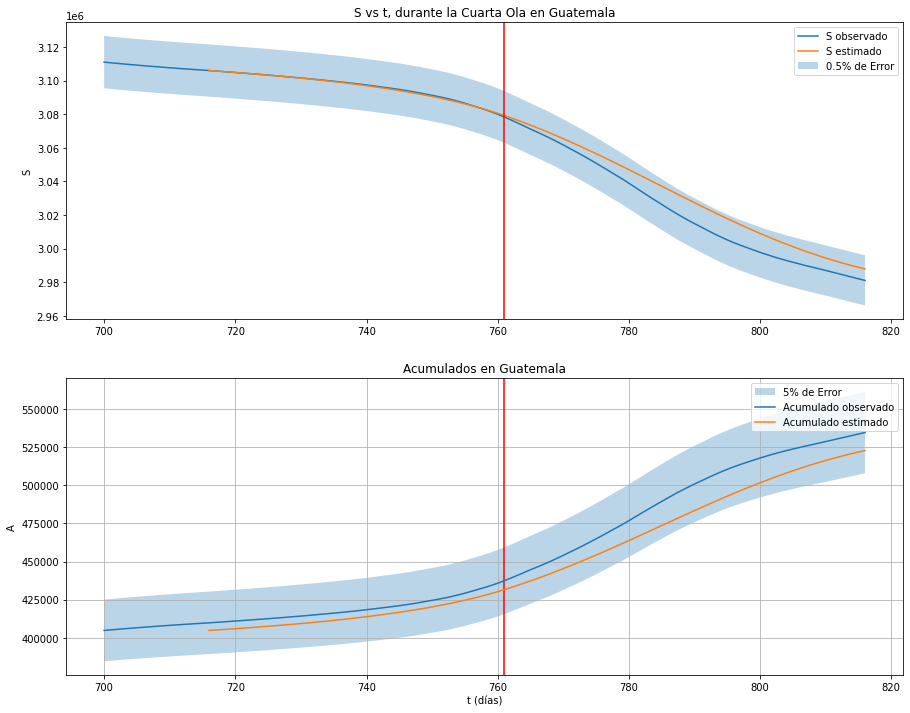

In [81]:
#OLA 2
#analizar
t1=80+700
t2 =80+ 817
x= []
for i in range(t1,t2):
    x.append(i-80) #Para las observaciones
    
    
x_observacion = []
for i in range(t0,t0+DeltaT):
    x_observacion.append(i) #Para las observaciones...NOOOO, es para las predicciones.



S_error_sup, S_error_inf = PorcentajeError(0.5, S[0][t1:t2]) 
A_error_sup, A_error_inf = PorcentajeError(5, A[0][t1:t2])     
    
fig, ax = plt.subplots(2,1, figsize=(15, 12))

ax[0].plot(x,S[0][t1:t2], label = "S observado")
ax[0].plot(x_observacion,Sucept[0:t], label = "S estimado" )
ax[0].legend(loc="best")
ax[0].set_title("S vs t, durante la Cuarta Ola en Guatemala")
ax[0].set_ylabel("S")
ax[0].axvline(x = 761., color = 'r', linestyle = '-')
ax[1].axvline(x = 761., color = 'r', linestyle = '-')

ax[0].fill_between(x, S_error_inf, S_error_sup, alpha=0.3, label = '0.5% de Error')
ax[0].legend(loc="best")

ax[1].fill_between(x, A_error_inf, A_error_sup, alpha=0.3, label = '5% de Error')
ax[1].legend(loc="best")


ax[1].plot(x, A[0][t1:t2], label = "Acumulado observado")
ax[1].plot(x_observacion,ACUMULADO[0:t], label = "Acumulado estimado")
ax[1].legend(loc="best")
ax[1].set_title("Acumulados en Guatemala")
ax[1].set_ylabel("A")
plt.xlabel("t (días)")
plt.ylabel("A")
plt.grid()
#plt.show()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'ModeladoOLA4Acumulados.pdf', bbox_inches = 'tight')


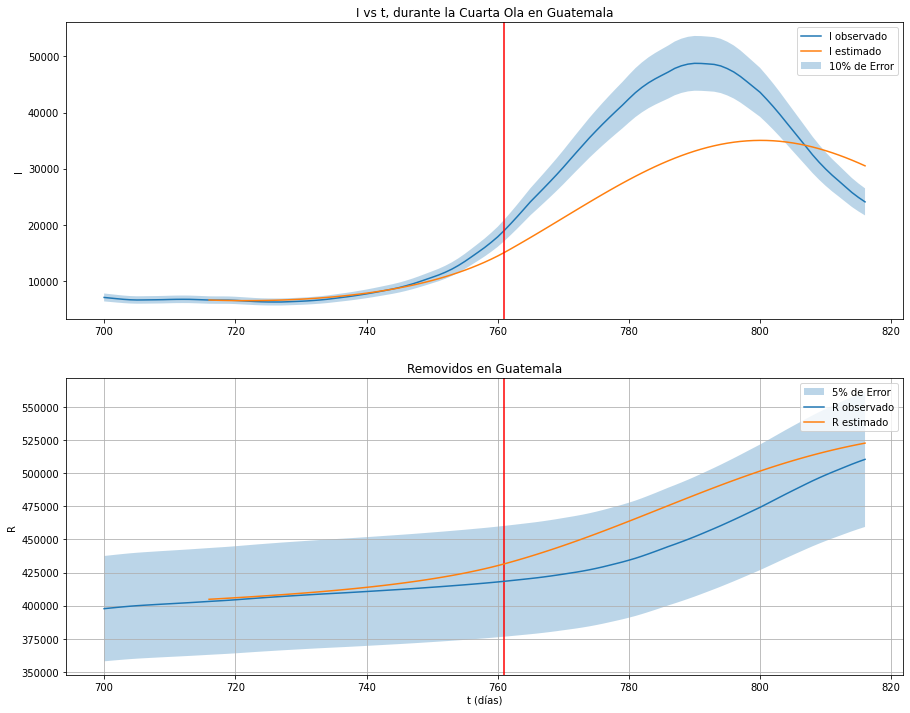

In [82]:
#OLA 2
#analizar
t1=80+700
t2 =80+ 817
x= []
for i in range(t1,t2):
    x.append(i-80) #Para las observaciones
    
    
x_observacion = []
for i in range(t0,t0+DeltaT):
    x_observacion.append(i) #Para las observaciones...NOOOO, es para las predicciones.



I_error_sup, I_error_inf = PorcentajeError(10, I[0][t1:t2]) 
R_error_sup, R_error_inf = PorcentajeError(10, R[0][t1:t2])     
    
fig, ax = plt.subplots(2,1, figsize=(15, 12))

ax[0].plot(x,I[0][t1:t2], label = "I observado")
ax[0].plot(x_observacion,Infectados[0:t], label = "I estimado" )
ax[0].legend(loc="best")
ax[0].set_title("I vs t, durante la Cuarta Ola en Guatemala")
ax[0].set_ylabel("I")
ax[0].axvline(x = 761., color = 'r', linestyle = '-')
ax[1].axvline(x = 761., color = 'r', linestyle = '-')

ax[0].fill_between(x, I_error_inf, I_error_sup, alpha=0.3, label = '10% de Error')
ax[0].legend(loc="best")

ax[1].fill_between(x, R_error_inf, R_error_sup, alpha=0.3, label = '5% de Error')
ax[1].legend(loc="best")


ax[1].plot(x, R[0][t1:t2], label = "R observado")
ax[1].plot(x_observacion,ACUMULADO[0:t], label = "R estimado")
ax[1].legend(loc="best")
ax[1].set_title("Removidos en Guatemala")
ax[1].set_ylabel("R")
plt.xlabel("t (días)")
plt.ylabel("R")
plt.grid()
#plt.show()
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'ModeladoOLA4Removidos.pdf', bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


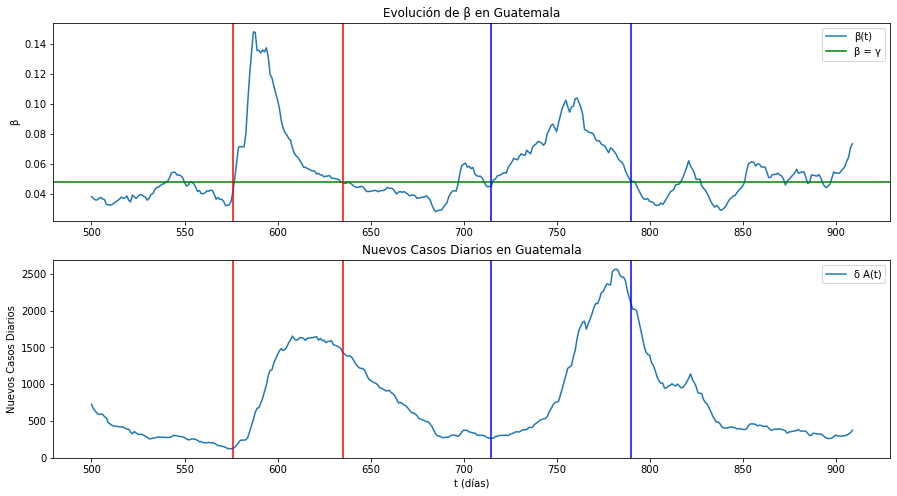

In [83]:
#analizar
#olas 3 y 4
Eje_x = []
for i in range(500,len(Beta[0])-1-80):
    Eje_x.append(i)
    
fig, ax = plt.subplots(2,1, figsize=(15, 8))
ax[0].plot(Eje_x, Beta[0][500 + 80:len(Beta[0])-1], label = "\u03B2(t)") # NOMBREDEPTO[0])
ax[0].axhline(y = 1/21., color = 'g', linestyle = '-', label = "\u03B2 = \u03B3")
ax[0].axvline(x = 76 + 500, color = 'r', linestyle = '-')
#ax[0].axvline(x = 90., color = 'r', linestyle = '-')
ax[0].axvline(x = 135 + 500, color = 'r', linestyle = '-')
#ax[0].axvline(x = 118., color = 'g', linestyle = '-')

ax[0].axvline(x = 215 + 500, color = 'b', linestyle = '-')
#ax[0].axvline(x = 260., color = 'b', linestyle = '-')
ax[0].axvline(x = 290 + 500, color = 'b', linestyle = '-')
#ax[0].axvline(x = 282., color = 'g', linestyle = '-')

ax[0].legend(loc="best")
ax[0].set_title("Evolución de \u03B2 en Guatemala")
#ax[0].set_xlabel("t (días)")
ax[0].set_ylabel("\u03B2")

ax[1].plot(Eje_x, dA[0][500+80:len(Beta[0])-1], label = "\u03B4 A(t)")# NOMBREDEPTO[0])
ax[1].axvline(x = 76 + 500, color = 'r', linestyle = '-')
#ax[1].axvline(x = 90., color = 'r', linestyle = '-')
ax[1].axvline(x = 135 + 500, color = 'r', linestyle = '-')
#ax[1].axvline(x = 118., color = 'g', linestyle = '-')
#ax[1].axvline(x = 185., color = 'k', linestyle = '-')

ax[1].axvline(x = 215+ 500, color = 'b', linestyle = '-')
#ax[1].axvline(x = 260., color = 'b', linestyle = '-')
ax[1].axvline(x = 290 + 500 , color = 'b', linestyle = '-')
#ax[1].axvline(x = 282., color = 'g', linestyle = '-')
#ax[1].axvline(x = 307., color = 'k', linestyle = '-')

ax[1].legend(loc="best")
ax[1].set_title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")
plt.savefig('OLAS/'+NOMBREDEPTO[n]+'FluctuacionesBetaOlas2y3.eps', bbox_inches = 'tight')


In [51]:
#Ola 1 Beta
#76 a 135 --> 59
#max en 90
#Ola 2 Beta
#215 a 290 -->  65
#max en 260
#Ola 3 Beta
#76 a 181 --> 105
#max en 128

#Ola 1 dA
#76 a 185  -->  109
#max en 118
#Ola 2 dA 
#215 a 307 --> 102
#max en 282
#Ola 3 dA 
#76 a 250  --> 144
#max en 173




In [40]:
Beta[0][500 + 80+118] #linea verde en ola 1

0.05558695285170521

In [41]:
Beta[0][500 + 80+282] #linea verde en ola 1

0.06632703962256738

Text(0, 0.5, 'Nuevos Casos Diarios')

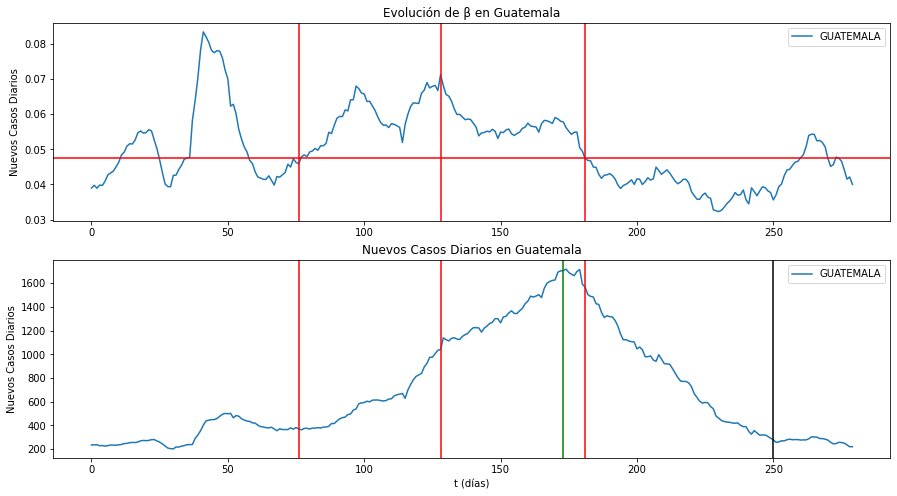

In [59]:
#analizar
fig, ax = plt.subplots(2,1, figsize=(15, 8))
ax[0].plot(Beta[0][280 + 80:640], label = NOMBREDEPTO[0])
ax[0].axhline(y = 1/21., color = 'r', linestyle = '-')
ax[0].axvline(x = 76., color = 'r', linestyle = '-')
ax[0].axvline(x = 181., color = 'r', linestyle = '-')
ax[0].axvline(x = 128., color = 'r', linestyle = '-')

ax[0].legend(loc="best")
ax[0].set_title("Evolución de \u03B2 en Guatemala")
#ax[0].set_xlabel("t (días)")
ax[0].set_ylabel("Nuevos Casos Diarios")

ax[1].plot(dA[0][280 + 80:640], label = NOMBREDEPTO[0])
ax[1].axvline(x = 76., color = 'r', linestyle = '-')
ax[1].axvline(x = 181., color = 'r', linestyle = '-')
ax[1].axvline(x = 128., color = 'r', linestyle = '-')
ax[1].axvline(x = 250., color = 'k', linestyle = '-')
ax[1].axvline(x = 173., color = 'g', linestyle = '-')


ax[1].legend(loc="best")
ax[1].set_title("Nuevos Casos Diarios en Guatemala")
plt.xlabel("t (días)")
plt.ylabel("Nuevos Casos Diarios")


In [ ]:
#solicitar paper de beta variable en el tiempo